# Biomedical image analysis - Introduction and Exploration

---
Requirements
1.   Standard scientific Python environment (numpy, scipy, matplotlib)
2.   pydicom
---
Reference 
1. Asan Medical Cancer Biomedical Informatics
---




In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
#바로 볼 수 있게

DICOM ( D igital I maging 및 CO의 mmunications의 M의 edicine)
 1. 의료 영상(X-ray, MRI, CT) 및 관련 정보를 가진다. 
 2. .dcm 확장자를 가지며 환자 정보, 이미지, 픽셀 데이터 등을 포함한다.
 3. 주로 단일 파일에 압축된 헤더 및 이미지 픽셀 강도 데이터로 구성된다. 헤더 내 의 정보는 표준화된 일련의 태그로 구성된다.

### **1. Read DICOM using pydicom**

Python 을 통해서 DICOM 파일을 읽어오는 방법
1. pydicom
2. SimpleITK 

주로 이 두가지 파이썬 모듈을 사용해서 dicom 파일을 읽어오고 데이터를 추출한다.

1.1. Install pydicom

In [3]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 4.8 MB/s 


1.2. Read a X-ray image


In [44]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_xray.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.203.4.2147483647.1474333227.88819
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.2.203.4.2147483647.1474333227.88819
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.203.4.2147483647.1474333227.88819
(0008, 0020) Study Date                 

### **2. Ploting using matplotlib**

DICOM 파일의 태그에서 데이터를 추출하면 환자 인구 통계, 연구 매개 변수 등에 관한 정보를 확인 할 수 있다. 

본 데이터셋은 가명화가 되어있는 상태이다.


Filename.........: /content/drive/MyDrive/data/medical_data/DICOM_xray.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.1.1

Patient's name...: LEE HYEON NA
Patient id.......: 34975253
Modality.........: DX
Study Date.......: 20160920
Image size.......: 2017 x 1833, 7394322 bytes
Slice location...: (missing)


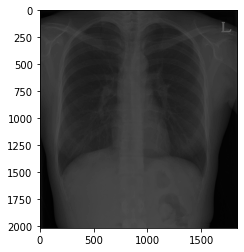

In [45]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

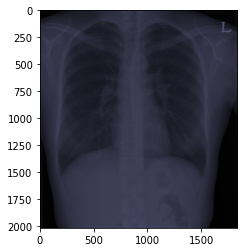

In [47]:
# change color map
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

### **3. Exercise to read and plot some DICOM files**


3.1. Read other X-ray images


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.9485.1517874343.334188
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.9485.1517874343.334188
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

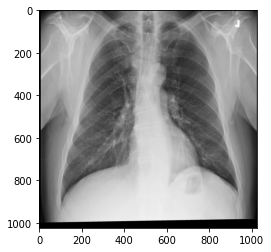

In [49]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_xray_RSNA2018_022b7bbd.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5107.1517874311.408139
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5107.1517874311.408139
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

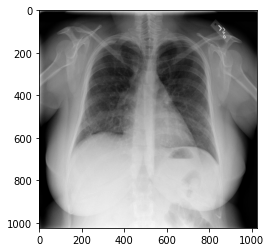

In [50]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_xray_RSNA2018_03aeb73d.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5254.1517874312.236489
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5254.1517874312.236489
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

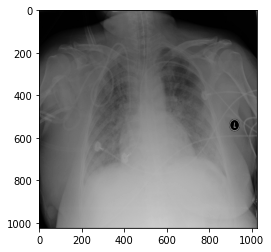

In [51]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_xray_RSNA2018_0087bd3a.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

3.2. Read a CT image

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
(0008, 0020) Study Date                          DA: '20180720'
(

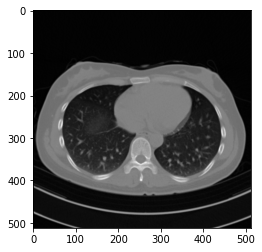

In [52]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_CT.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

3.3. Read other CT images


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 9999.95324188698777914192525602158715720583
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.38'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_002a0da96
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_f10ee253'
(0020, 000d) Study Instance UID                  UI: ID_c6f74d0526
(0020, 000e) Series Instance UID                 UI: ID_407ddee40b
(0020, 0010) Study ID                            SH: ''
(0020, 003

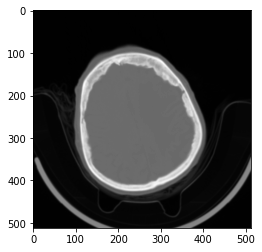

In [54]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_CT_RSNA2019_002a0da96.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPInstanceUID)
print()

# print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()


Filename.........: /content/drive/MyDrive/data/medical_data/DICOM_CT_RSNA2019_002a0da96.dcm
Storage type.....: ID_002a0da96

Patient id.......: ID_f10ee253
Modality.........: CT
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.48828125, 0.48828125]
Slice location...: (missing)


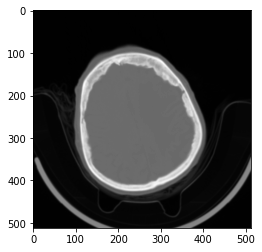

In [55]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPInstanceUID)
print()

print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

3.4. Read MRI images

* T1 weighted image
* T2 weighted image
* FLAIR image


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114375115610
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20061201'
(0008, 0013) Instance Creation Time              TM: '145331.000000'
(0008, 0014) I

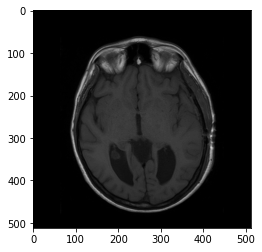

In [56]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/BRAINIX/DICOM/T1/BRAINIX_DICOM_T1_IM-0001-0013.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114290581513
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20061201'
(0008, 0013) Instance Creation Time              TM: '145313.000000'
(0008, 0014) I

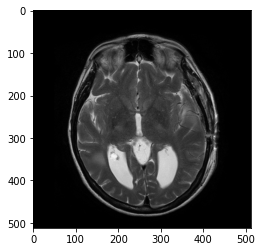

In [57]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/BRAINIX/DICOM/T2/BRAINIX_DICOM_T2_IM-0001-0013.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114313964543
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_IR', 'M', 'IR']
(0008, 0012) Instance Creation Date              DA: '20061201'
(0008, 0013) Instance Creation Time              TM: '145321.000000'
(0008, 0014) I

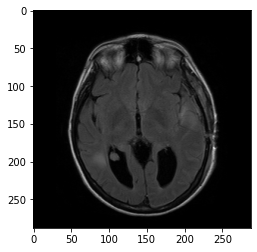

In [58]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/BRAINIX/DICOM/FLAIR/BRAINIX_DICOM_FLAIR_IM-0001-0013.dcm'
dataset = pydicom.dcmread(filename)

print(dataset)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

### **4. Read a CT DICOM and plot using matplotlib**

This example illustrates how to access a pixel, convert pixel intensity value into CT density, and show some windonwing results using matplotlib.



Filename.........: /content/drive/MyDrive/data/medical_data/DICOM_CT.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: LEE HYEON NA
Patient id.......: 34975253
Modality.........: CT
Study Date.......: 20180720
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.634765625, 0.634765625]
Slice location...: -1292.3


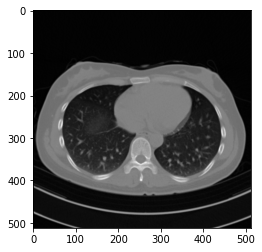

In [59]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

filename = '/content/drive/MyDrive/data/medical_data/DICOM_CT.dcm'
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

print("Patient's name...:", dataset.PatientName)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.gray)
plt.show()

4.1. Access a pixel

In [19]:
# To access a pixel within lung region
print("Pixel intensity at (400, 300):", dataset.pixel_array[400, 300])

Pixel intensity at (400, 300): 1065


In [20]:
# To access a pixel within heart region
print("Pixel intensity at (300, 200):", dataset.pixel_array[300, 200])
# To access a pixel within bone region
print("Pixel intensity at (65, 270):", dataset.pixel_array[65, 270])

Pixel intensity at (300, 200): 304
Pixel intensity at (65, 270): 24


* *Dataset.pixel_array* returns a *numpy.ndarray* containing the pixel data

* In *numpy.ndarray*, an array is indexed in the opposite order (y, x)

In [21]:
# To access a pixel within lung region
print("Pixel intensity at (400, 300):", dataset.pixel_array[300, 400])
# To access a pixel within heart region
print("Pixel intensity at (300, 200):", dataset.pixel_array[200, 300])
print("Pixel intensity at (65, 270):", dataset.pixel_array[270, 65])

Pixel intensity at (400, 300): 237
Pixel intensity at (300, 200): 1066
Pixel intensity at (65, 270): 1392


Is the pixel intensity at (400, 300) matched to the HU value for the lung parehchyma?


4.2. Convert pixel intensity into CT density

* CT_density = pixel_intensity * *rescale_slope* + *rescale_intercept*

In [22]:
print(dataset)

# Convert pixel intensity value into CT density
CT_density_array = dataset.pixel_array * dataset.RescaleSlope + dataset.RescaleIntercept

print("CT density at (400, 300):", CT_density_array[300, 400])
print("CT density at (300, 200):", CT_density_array[200, 300])
print("CT density at (65, 270):", CT_density_array[270, 65])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.64716.30000018071921132266200009937
(0008, 0020) Study Date                          DA: '20180720'
(

4.3. Apply some windowing settings


Soft tissue: level 40, width 400


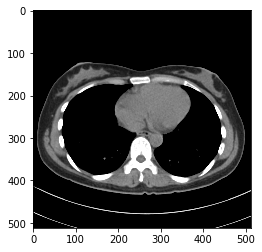

Lung: level -600, width 1600


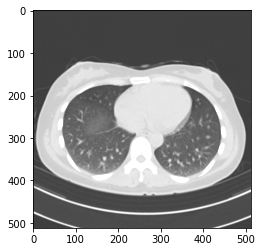

Bone: level 300, width 2000


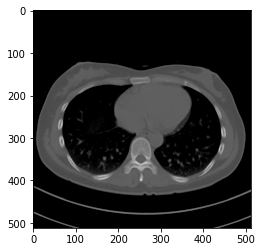

In [23]:
# Windowing

# for soft tissue
# level 40, width 400 -> min -160, max 240
print("Soft tissue: level 40, width 400")
plt.imshow(CT_density_array, cmap=plt.cm.gray, vmin=-160, vmax=240)
plt.show()

# for lung
# level -600, width 1600 -> min -1400, max 200
print("Lung: level -600, width 1600")
plt.imshow(CT_density_array, cmap=plt.cm.gray, vmin=-1400, vmax=200)
plt.show()

# for bone
# level 300, width 2000 -> min -700, max 1300
print("Bone: level 300, width 2000")
plt.imshow(CT_density_array, cmap=plt.cm.gray, vmin=-700, vmax=1300)
plt.show()

### **5. Read CT and MRI volume files using simpleITK and plot using matplotlib**

This example illustrates how to read a volume file, access a pixel, and show MPR views using matplotlib.


In [24]:
!pip install SimpleITK

     |████████████████████████████████| 48.4 MB 2.0 MB/s 


In [26]:
import SimpleITK as sitk

5.1. Read a CT volume file (NIfTI)

In [60]:
image_3D = sitk.ReadImage('/content/drive/MyDrive/data/medical_data/LUNA_CT.nii')

5.2. Get the image information

In [28]:
print(image_3D.GetSize())
print(image_3D.GetSpacing())

(512, 512, 538)
(0.7421879768371582, 0.7421879768371582, 0.625)


In [29]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
512
512
538


5.3. Access a pixel

* In ITK's *Image* class, an array is ordered as (x, y, z)

In [30]:
print("Pixel intensity at (360, 250, 370):", image_3D.GetPixel(360, 250, 370))
print("Pixel intensity at (360, 250, 370):", image_3D[360, 250, 370])

Pixel intensity at (360, 250, 370): -371
Pixel intensity at (360, 250, 370): -371


5.4. Convert into *numpy.ndarray*

* The order of index and dimensions need careful attention during conversion

In [31]:
array_3D = sitk.GetArrayFromImage(image_3D)

In [32]:
print("Pixel intensity at (360, 250, 370):", array_3D[370, 250, 360])
print("Pixel intensity at (370, 250, 360):", array_3D[360, 250, 370])

Pixel intensity at (360, 250, 370): -371
Pixel intensity at (370, 250, 360): -911


5.5. Plot MPR views

Axial


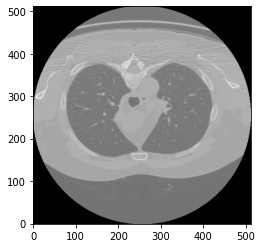

Coronal


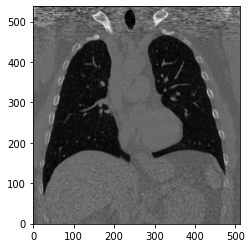

Sagittal


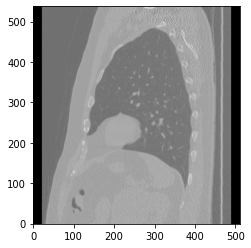

In [33]:
#plot MPR
print("Axial")
axial_slice_image = array_3D[370,:,:]
plt.imshow(axial_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Coronal")
coronal_slice_image = array_3D[:,250,:]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Sagittal")
coronal_slice_image = array_3D[:,:,360]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

5.6. Plot MPR views by applying the lung windowing

Lung: level -600, width 1600
Axial


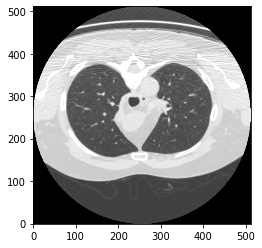

Coronal


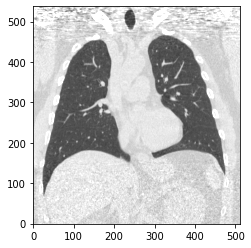

Sagittal


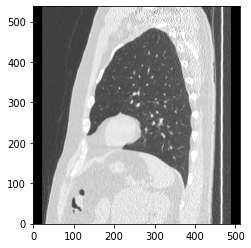

In [34]:
# for lung windowing: level -600, width 1600 -> min -1400, max 200
print("Lung: level -600, width 1600")
print("Axial")
axial_slice_image = array_3D[370,:,:]
plt.imshow(axial_slice_image, cmap=plt.cm.gray, vmin=-1400, vmax=200)
plt.gca().invert_yaxis()
plt.show()

print("Coronal")
coronal_slice_image = array_3D[:,250,:]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray, vmin=-1400, vmax=200)
plt.gca().invert_yaxis()
plt.show()

print("Sagittal")
coronal_slice_image = array_3D[:,:,360]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray, vmin=-1400, vmax=200)
plt.gca().invert_yaxis()
plt.show()


[Important] We **DO NOT need to convert** the pixel intensity into CT density

5.7. Read a MRI volume file (Analyze)

(176, 208, 176)
(1.0, 1.0, 1.0)
Axial


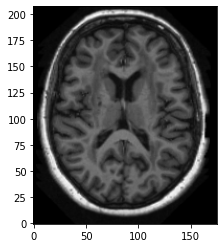

Coronal


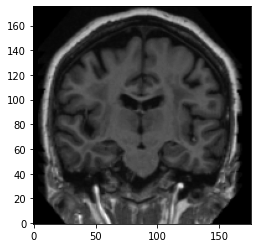

Sagittal


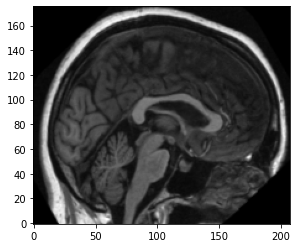

In [35]:
image_T1 = sitk.ReadImage('/content/drive/MyDrive/data/medical_data/OAS1_0030_MR1.hdr')

print(image_T1.GetSize())
print(image_T1.GetSpacing())

array_T1 = sitk.GetArrayFromImage(image_T1)

#plot MPR
print("Axial")
axial_slice_image = array_T1[88,:,:]
plt.imshow(axial_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Coronal")
coronal_slice_image = array_T1[:,104,:]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Sagittal")
coronal_slice_image = array_T1[:,:,88]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

### **6. Build a histogram**

This example illustrates what is histogram and how to build the histogram.

6.1. Read a CT volume file (NIfTI) and convert into *numpy.ndarray*

DICOM 정보는 프레임워크의 input으로 사용할 수 없기 때문에
단일 3D numpy 배열로 처리하는 작업이 필요하다. 

In [36]:
import numpy as np

image_3D = sitk.ReadImage('/content/drive/MyDrive/data/medical_data/LUNA_CT.nii')
array_3D = sitk.GetArrayFromImage(image_3D)

print(image_3D.GetSize())
print("The total number of pixels in this CT volume: ", image_3D.GetSize()[0] * image_3D.GetSize()[1] * image_3D.GetSize()[2])

(512, 512, 538)
The total number of pixels in this CT volume:  141033472


6.2. Caluate the histogram using *numpy*

In [37]:
hist,bins = np.histogram(array_3D)
print(hist)

print("The sum of counts in this histogram: ", sum(hist))

[30005336        0        0  6344212 32704242 43567688 27313277  1025830
    71972      915]
The sum of counts in this histogram:  141033472


In [61]:
# help(np.histogram)

The sum of counts in this histogram:  141033472


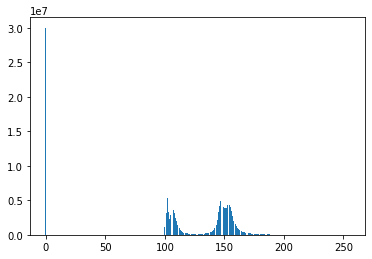

In [39]:
import matplotlib.pyplot as plt
nbins = 256

hist,bins = np.histogram(array_3D, nbins)
plt.bar(np.arange(nbins), hist)

print("The sum of counts in this histogram: ", sum(hist))

The minimum intensity of the CT volume:  -3024
The maximum intensity of the CT volume:  2054
The sum of counts in this histogram:  111028136


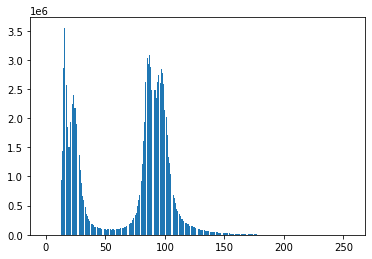

In [40]:
nbins = 256
min_intensity = np.min(array_3D)
max_intensity = np.max(array_3D)
print("The minimum intensity of the CT volume: ", min_intensity)
print("The maximum intensity of the CT volume: ", max_intensity)

hist,bins = np.histogram(array_3D, nbins, [-1200, max_intensity])
plt.bar(np.arange(nbins), hist)

print("The sum of counts in this histogram: ", sum(hist))

6.3. Caluate the histogram from the masked region

Axial


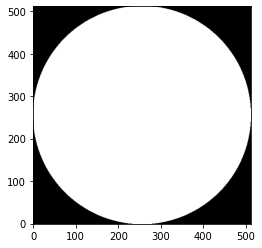

Coronal


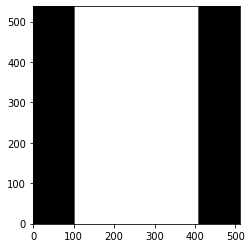

Sagittal


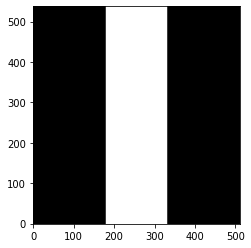

In [41]:
array_binary = (array_3D>-3024) * 1

#plot MPR
print("Axial")
axial_slice_image = array_binary[300,:,:]
plt.imshow(axial_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Coronal")
coronal_slice_image = array_binary[:,50,:]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()

print("Sagittal")
coronal_slice_image = array_binary[:,:,500]
plt.imshow(coronal_slice_image, cmap=plt.cm.gray)
plt.gca().invert_yaxis()
plt.show()


The sum of counts in this histogram:  111028136


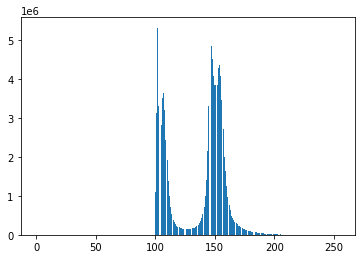

In [42]:
nbins = 256

hist,bins = np.histogram(array_3D, nbins, weights=array_binary)
plt.bar(np.arange(nbins), hist)

print("The sum of counts in this histogram: ", sum(hist))